<a href="https://colab.research.google.com/github/shwldus067/colab/blob/main/hgml_6_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주성분 분석
## PCA 클래스

In [ ]:
!wget https://bit.ly/fruits_300 -O fruits_300.npy

--2021-02-23 15:45:38--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2021-02-23 15:45:38--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2021-02-23 15:45:38--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443..

In [ ]:
import numpy as np

In [ ]:
fruits=np.load('fruits_300.npy')
fruits_2d=fruits.reshape(-1, 100*100)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=50)
pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print(pca.components_.shape)

(50, 10000)


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def draw_fruits(arr, ratio=1):
  n=len(arr)
  rows=int(np.ceil(n/10))
  cols=n if rows<2 else 10
  fig, axs=plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10+j<n:
        axs[i, j].imshow(arr[i*10+j], cmap='gray_r')
      axs[i, j].axis('off')
  plt.show()

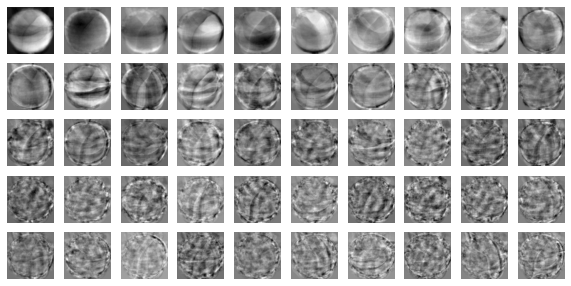

In [ ]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [ ]:
print(fruits_2d.shape)

(300, 10000)


In [ ]:
fruits_pca=pca.transform(fruits_2d)

In [ ]:
print(fruits_pca.shape) # 100*100개의 차원(특성)이 50개의 차원(특성)으로 축소됨

(300, 50)


## 원본 데이터 재구성

In [ ]:
fruits_inverse=pca.inverse_transform(fruits_pca)

In [ ]:
print(fruits_inverse.shape)

(300, 10000)


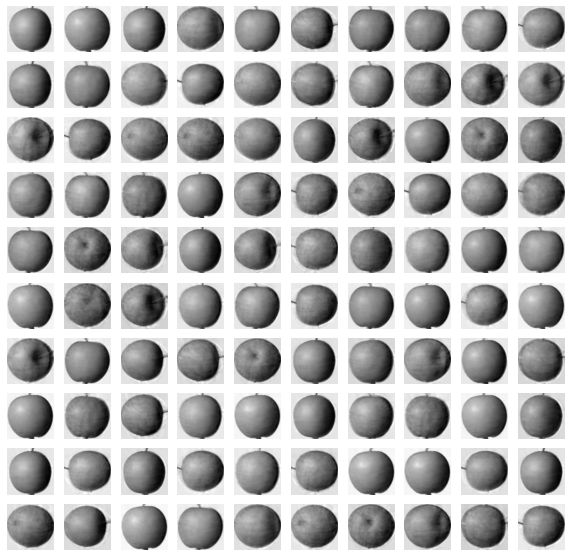

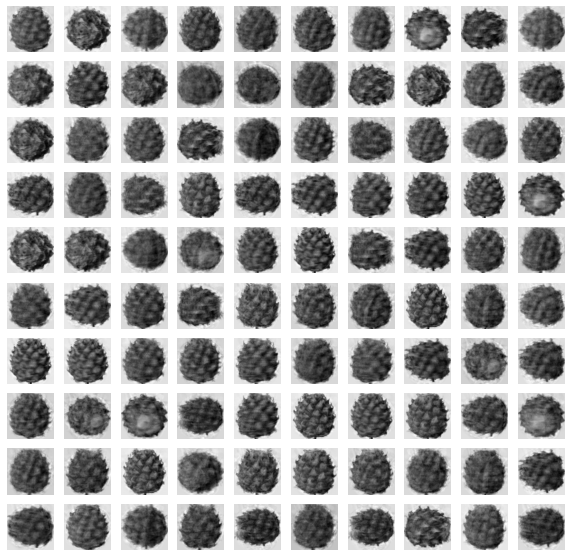

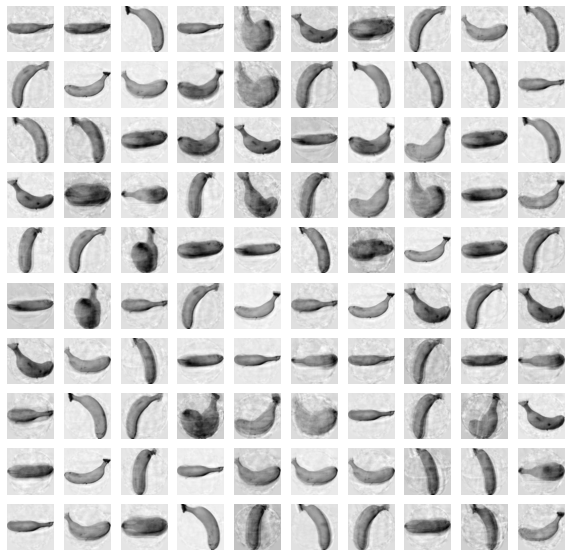

In [ ]:
fruits_reconstruct=fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

## 설명된 분산

In [ ]:
print(np.sum(pca.explained_variance_ratio_))

0.9215946757326863


In [ ]:
print(np.sum(pca.explained_variance_))

30080675.863271


In [ ]:
print(pca.explained_variance_)  # 각 주성분의 설명된 분산

[13825250.21582003  3244970.17261192  2147002.11072803  1315766.76701662
  1115261.57182833  1071019.42512488   839909.33515166   670735.9720795
   447908.41098528   438278.50192572   376058.33826825   308314.27194082
   286653.15328115   276360.41318761   226209.95558808   210588.27844175
   188950.36652903   166855.29609984   158754.31970731   156784.11035697
   146172.84163542   142740.01074623   133183.36623671   127124.19421758
   121558.0395156    117268.19802218   108184.07045682   103741.65870613
    99331.52062396    99146.91085804    94308.82763759    90043.95739671
    86456.94279236    83479.62739643    82297.27125455    80696.42494478
    78214.48261766    75386.60002114    72422.76767214    70735.8039944
    69759.84482872    63939.69761733    62983.61071397    62458.20577548
    60403.46069111    59369.94724648    56926.29278215    54508.37014381
    53480.2336173     52721.69643546]


In [ ]:
print(pca.explained_variance_ratio_)  # 각 주성분이 설명된 분산의 총 합에서 차지하는 비율

[0.42357017 0.09941755 0.06577863 0.04031172 0.03416875 0.03281329
 0.02573267 0.02054963 0.01372276 0.01342773 0.01152146 0.00944596
 0.00878232 0.00846697 0.00693049 0.00645188 0.00578895 0.00511202
 0.00486382 0.00480346 0.00447836 0.00437319 0.0040804  0.00389476
 0.00372423 0.0035928  0.00331448 0.00317838 0.00304326 0.00303761
 0.00288938 0.00275872 0.00264882 0.0025576  0.00252138 0.00247233
 0.00239629 0.00230965 0.00221885 0.00216716 0.00213726 0.00195895
 0.00192966 0.00191356 0.00185061 0.00181894 0.00174408 0.00167
 0.0016385  0.00161526]


## 다른 알고리즘과 함께 사용하기

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()

In [ ]:
target=np.array([0]*100+[1]*100+[2]*100)

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
scores=cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.7386836528778076


In [ ]:
scores=cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.028316402435302736


In [ ]:
pca=PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print(pca.n_components_)

2


In [ ]:
fruits_pca=pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [ ]:
scores=cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.048621606826782224


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km=KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))


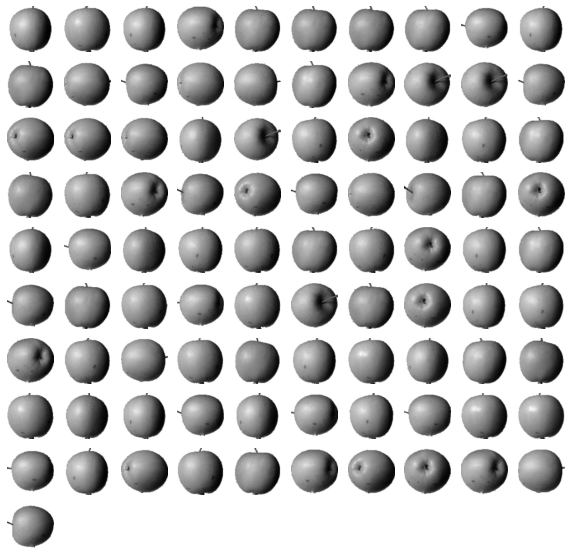

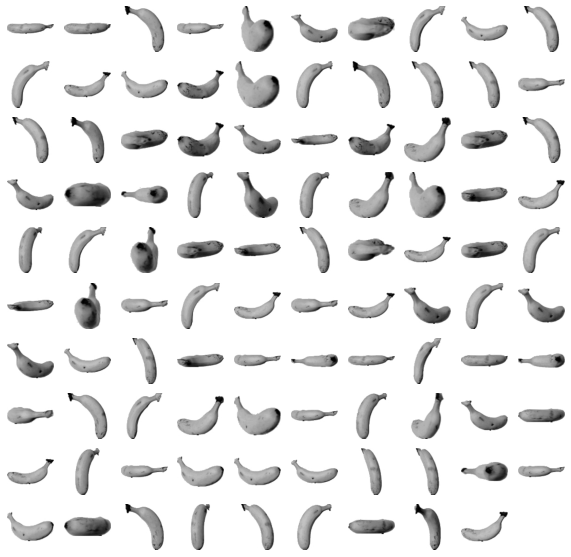

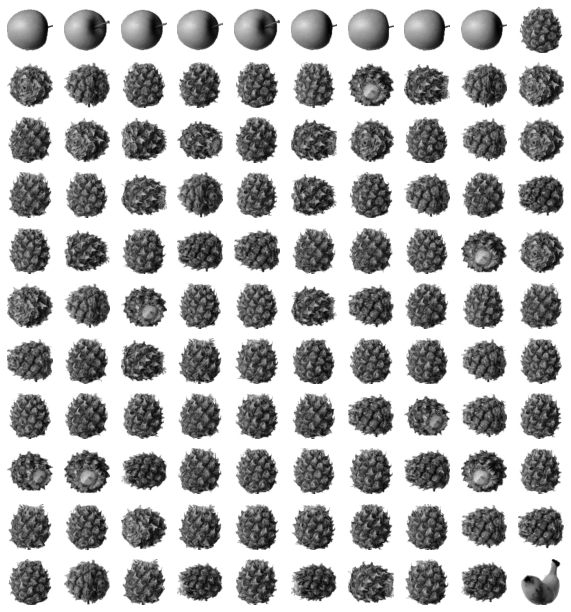

In [ ]:
for label in range(0, 3):
  draw_fruits(fruits[km.labels_==label])
  print("\n")

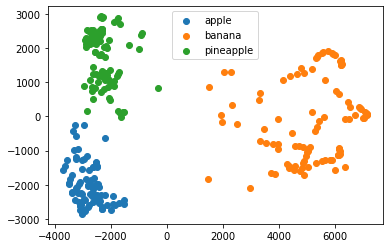

In [ ]:
for label in range(0, 3):
  data=fruits_pca[km.labels_==label]
  plt.scatter(data[:, 0], data[:, 1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()